# U-Net

With different backbones

### Check Hardware

In [ ]:
!pip install prime_printer==0.1.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 31.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 89.8 MB/s eta 0:00:00
  Created wheel for prime_printer: filename=prime_printer-0.1.3-py3-none-any.whl size=440709 sha256=4689997aa4075d084f6284a3eb588ba768c00cb8a684ff06b6d34af0a4895631
  Stored in directory: /root/.cache/pip/wheels/6d/e3/5a/50dd94b7f410862a450abdad7f5dcb3ff322e3423de60f76fe
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7392 sha256=897cad6e14b9ca77f8171a0c3147ea114404b92ddafc889d813f46bf7af572f4
  Stored in directory: /root/.cache/pip/wheels/2b/4d/8f/55fb4f7b9b591891e8d3f72977c4ec6c7763b39c19f0861595
Successfully built prime_printer gputil


In [ ]:
import prime_printer as prime

print(prime.get_hardware())


-------------------------------- 
Your Hardware:

    ---> General <---
Operatingsystem: Linux
Version: #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
Architecture: ('64bit', 'ELF')
Processor: x86_64

    ---> GPU <---
GPU Name: NVIDIA A100-SXM4-40GB
VRAM Total: 40960 MB
VRAM Used: 0 MB
Utilization: 0.0 %
PyTorch Support: True (NVIDIA A100-SXM4-40GB)
TensorFlow Support: False -> not installed

    ---> CPU <---
CPU-Name: Intel(R) Xeon(R) CPU @ 2.20GHz
CPU Kernels: 6
Logical CPU-Kernels: 12
CPU-Frequence: 0 MHz
CPU-Utilization: 0.7 %

    ---> RAM <---
RAM Total: 83 GB
RAM Available: 80 GB
RAM-Utilization: 3.3 %

--------------------------------


### Install Packages

In [ ]:
!pip install -q segmentation-models-pytorch==0.3.3
!pip install -q albumentations==1.3.0
!pip install -q torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 130.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 105.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Download COCO dataset

As:
```
data/
└── coco/
    ├── images/
    │   ├── train2017/
    │   └── val2017/
    └── annotations/
        └── annotations_trainval2017/
```

In [ ]:
!pip install pycocotools

In [ ]:
# Create directories
!mkdir -p data/coco/images
!mkdir -p data/coco/annotations

# Navigate to the images directory
%cd data/coco/images

# Download training and validation images
!wget http://images.cocodataset.org/zips/train2017.zip
!wget http://images.cocodataset.org/zips/val2017.zip

# Unzip the image files
!unzip train2017.zip
!unzip val2017.zip

# Remove the zip files to save space
!rm train2017.zip val2017.zip

# Navigate to the annotations directory
%cd ../annotations

# Download annotations for training and validation
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

# Unzip the annotations
!unzip annotations_trainval2017.zip

# Remove the zip file
!rm annotations_trainval2017.zip

# Return to the base directory
%cd ../../..


Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
 extracting: val2017/000000433980.jpg  
 extracting: val2017/000000228144.jpg  
 extracting: val2017/000000041872.jpg  
 extracting: val2017/000000117492.jpg  
 extracting: val2017/000000368900.jpg  
 extracting: val2017/000000376900.jpg  
 extracting: val2017/000000352491.jpg  
 extracting: val2017/000000330790.jpg  
 extracting: val2017/000000384850.jpg  
 extracting: val2017/000000032735.jpg  
 extracting: val2017/000000197004.jpg  
 extracting: val2017/000000526751.jpg  
 extracting: val2017/000000041488.jpg  
 extracting: val2017/000000153632.jpg  
 extracting: val2017/000000501523.jpg  
 extracting: val2017/000000405691.jpg  
 extracting: val2017/000000040757.jpg  
 extracting: val2017/000000219485.jpg  
 extracting: val2017/000000428280.jpg  
 extracting: val2017/000000209222.jpg  
 extracting: val2017/000000353051.jpg  
 extracting: val2017/000000191471.jpg  
 extracting: val2017/000000539962.jpg  
 extracting: 

### Imports


In [ ]:
import os

from PIL import Image
import cv2

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset

import segmentation_models_pytorch as smp
from pycocotools import mask as coco_mask

### Load Dataset

In [ ]:
from PIL import Image
from torchvision import transforms
import torch
from pycocotools import mask as coco_mask
import numpy as np
import cv2

# Funktion zur Umwandlung von Annotationsdaten in eine Maske
def annotations_to_mask(annotations, height, width):
    mask = np.zeros((height, width), dtype=np.uint8)

    for obj in annotations:
        # RLE-Dekodierung
        rle = coco_mask.frPyObjects(obj['segmentation'], height, width)
        m = coco_mask.decode(rle)

        # Wenn die Maske 3D ist, auf 2D reduzieren
        if len(m.shape) == 3:
            m = np.any(m, axis=2)

        # Reskalierung auf die Zielgröße
        m_resized = cv2.resize(m.astype(np.uint8), (width, height), interpolation=cv2.INTER_NEAREST)

        # Masken kombinieren
        mask |= m_resized

    return torch.from_numpy(mask)

# Transformationen für Bilddaten
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Skalierung auf 256x256
    transforms.ToTensor()  # Umwandlung in Tensor
])

# Collate-Funktion für DataLoader
def coco_mask_collate_fn(batch):
    images, targets = zip(*batch)  # Bilder und Annotationsdaten trennen

    # Transformation auf jedes Bild anwenden (nur wenn das Bild im richtigen Format ist)
    images = [transform(img) if isinstance(img, Image.Image) else img for img in images]
    images = torch.stack(images, 0)  # Bilder stapeln

    masks = []
    for img, anns in zip(images, targets):
        height, width = img.shape[1], img.shape[2]  # Bildhöhe und -breite
        mask = annotations_to_mask(anns, height, width)
        masks.append(mask)

    masks = torch.stack(masks, 0)  # Masken stapeln
    return images, masks


In [ ]:
from torchvision.datasets import CocoDetection

# Define the paths
train_img_path = 'data/coco/images/train2017'
train_ann_path = 'data/coco/annotations/annotations/instances_train2017.json'

val_img_path = 'data/coco/images/val2017'
val_ann_path = 'data/coco/annotations/annotations/instances_val2017.json'

# Define transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# correct batching
# def coco_collate_fn(batch):
#     images = [item[0] for item in batch]  # already transformed
#     targets = [item[1] for item in batch]  # list of annotations per image
#     return torch.stack(images), targets

# Create the datasets
train_dataset = CocoDetection(root=train_img_path, annFile=train_ann_path, transform=transform)
val_dataset = CocoDetection(root=val_img_path, annFile=val_ann_path, transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=64, shuffle=True, num_workers=2, collate_fn=coco_mask_collate_fn
)

val_loader = torch.utils.data.DataLoader(
    val_dataset, batch_size=64, shuffle=False, num_workers=2, collate_fn=coco_mask_collate_fn
)

loading annotations into memory...
Done (t=31.08s)
creating index...
index created!
loading annotations into memory...
Done (t=0.53s)
creating index...
index created!


### U-Net Architectures

**Vanilla U-Net**

In [ ]:
class UNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=1):
        super(UNet, self).__init__()

        def conv_block(in_ch, out_ch):
            return nn.Sequential(
                nn.Conv2d(in_ch, out_ch, kernel_size=3, padding=1),
                nn.ReLU(inplace=True),
                nn.Conv2d(out_ch, out_ch, kernel_size=3, padding=1),
                nn.ReLU(inplace=True)
            )

        self.down1 = conv_block(in_channels, 64)
        self.pool1 = nn.MaxPool2d(2)
        self.down2 = conv_block(64, 128)
        self.pool2 = nn.MaxPool2d(2)

        self.bottleneck = conv_block(128, 256)

        self.up2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.upconv2 = conv_block(256, 128)
        self.up1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.upconv1 = conv_block(128, 64)

        self.final = nn.Conv2d(64, out_channels, kernel_size=1)

    def forward(self, x):
        d1 = self.down1(x)
        p1 = self.pool1(d1)
        d2 = self.down2(p1)
        p2 = self.pool2(d2)

        bottleneck = self.bottleneck(p2)

        up2 = self.up2(bottleneck)
        merge2 = torch.cat([up2, d2], dim=1)
        upconv2 = self.upconv2(merge2)

        up1 = self.up1(upconv2)
        merge1 = torch.cat([up1, d1], dim=1)
        upconv1 = self.upconv1(merge1)

        return torch.sigmoid(self.final(upconv1))

In [ ]:
vanilla_unet = UNet()

**Resnet U-Net**

In [ ]:
# Pretrained U-Net with ResNet34 encoder from segmentation_models_pytorch
resnet_unet = smp.Unet(
    encoder_name="resnet34",        # Encoder backbone
    encoder_weights="imagenet",     # Pre-trained on ImageNet
    in_channels=3,
    classes=1,
    activation="sigmoid"
)

**SWIN U-Net**

-> see: https://docs.monai.io/en/1.3.0/_modules/monai/networks/nets/swin_unetr.html

In [ ]:
# !pip install -q monai

# from monai.networks.nets import SwinUNETR

# swin_unet = SwinUNETR(
#                   img_size=(224, 224, 224),  # for 3D medical images — you can adapt this
#                   in_channels=1,
#                   out_channels=14,
#                   feature_size=48,
#                   drop_rate=0.0,
#                   attn_drop_rate=0.0,
#                   dropout_path_rate=0.0,
#                   use_checkpoint=False,
#               ).to("cuda" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.11/dist-packages/monai/utils/deprecate_utils.py:221: FutureWarning: monai.networks.nets.swin_unetr SwinUNETR.__init__:img_size: Argument `img_size` has been deprecated since version 1.3. It will be removed in version 1.5. The img_size argument is not required anymore and checks on the input size are run during forward().
  warn_deprecated(argname, msg, warning_category)


Alternatives:

In [ ]:
# !git clone https://github.com/HuCaoFighting/Swin-Unet.git
# %cd Swin-Unet
# !pip install -r requirements.txt
# %cd ..
# !ls

# import sys
# sys.path.append('./Swin-Unet')
# from model.swin_unet import SwinUnet as ViT_seg

# Load pretrained model
# swin_unet = ViT_seg(img_size=224, num_classes=1, zero_head=True)

# initialize randomly -> mybe use pretrained?
# swin_unet.load_from(None)
# swin_unet.eval()

In [ ]:
# !pip install timm segmentation-models-pytorch

# # import timm
# import segmentation_models_pytorch as smp

# # Load a pretrained Swin Transformer backbone from timm
# swin_encoder = timm.create_model(
#     'swin_base_patch4_window7_224',
#     features_only=True,  # <-- important
#     pretrained=True
# )

# # Check feature shapes from the encoder
# for i, f in enumerate(swin_encoder.feature_info.channels()):
#     print(f"Stage {i+1} channels:", f)

# # Create a U-Net using this encoder
# model = smp.Unet(
#     encoder_name='timm-swin_base_patch4_window7_224',
#     encoder_weights='imagenet',
#     in_channels=3,
#     classes=1,
#     activation=None,
# )

### Show Architecture

In [ ]:
!pip install torchsummary
!pip install torchviz

In [ ]:
from torchsummary import summary
from torchviz import make_dot

In [ ]:
def show_model(model, device='cuda'):
  model = model.to(device)
  summary(model, input_size=(3, 256, 256))

  # Pass a dummy input through the model
  dummy_input = torch.randn(1, 3, 256, 256).to(device)
  output = model(dummy_input)

  # Visualize the model graph
  dot = make_dot(output, params=dict(model.named_parameters()))
  dot.render("model_graph", format="png")  # This saves the graph as a PNG file
  dot.view()  # This opens the graph using the default viewer

In [ ]:
show_model(vanilla_unet)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
              ReLU-2         [-1, 64, 256, 256]               0
            Conv2d-3         [-1, 64, 256, 256]          36,928
              ReLU-4         [-1, 64, 256, 256]               0
         MaxPool2d-5         [-1, 64, 128, 128]               0
            Conv2d-6        [-1, 128, 128, 128]          73,856
              ReLU-7        [-1, 128, 128, 128]               0
            Conv2d-8        [-1, 128, 128, 128]         147,584
              ReLU-9        [-1, 128, 128, 128]               0
        MaxPool2d-10          [-1, 128, 64, 64]               0
           Conv2d-11          [-1, 256, 64, 64]         295,168
             ReLU-12          [-1, 256, 64, 64]               0
           Conv2d-13          [-1, 256, 64, 64]         590,080
             ReLU-14          [-1, 256,

In [ ]:
show_model(resnet_unet)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 128, 128]           9,408
       BatchNorm2d-2         [-1, 64, 128, 128]             128
              ReLU-3         [-1, 64, 128, 128]               0
         MaxPool2d-4           [-1, 64, 64, 64]               0
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
              ReLU-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
             ReLU-10           [-1, 64, 64, 64]               0
       BasicBlock-11           [-1, 64, 64, 64]               0
           Conv2d-12           [-1, 64, 64, 64]          36,864
      BatchNorm2d-13           [-1, 64, 64, 64]             128
             ReLU-14           [-1, 64,

In [ ]:
# show_model(swin_unet)

### Training


In [ ]:
def train(model, loader, optimizer, criterion):
    model.train()
    total_loss = 0

    for images, masks in loader:
        images = images.cuda()
        masks = masks.cuda().unsqueeze(1).float()  # Adjust shape

        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(loader)


In [ ]:
# dice score for evaluation
def dice_coef(preds, targets, threshold=0.5):
    preds = (torch.sigmoid(preds) > threshold).float()
    smooth = 1e-6
    intersection = (preds * targets).sum()
    union = preds.sum() + targets.sum()
    return (2. * intersection + smooth) / (union + smooth)

In [ ]:
def toplevel_train(model):
  model.train()

  # criterion = torch.nn.BCEWithLogitsLoss()
  criterion = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
  num_epochs = 5

  for epoch in range(num_epochs):
      train_loss = train(model, train_loader, optimizer, criterion)
      print(f"Epoch {epoch+1}/{num_epochs} - Loss: {train_loss:.4f}")

In [ ]:
# toplevel_train(swin_unet)

In [ ]:
toplevel_train(vanilla_unet)

Epoch 1/5 - Loss: 0.0000
Epoch 2/5 - Loss: 0.0000
Epoch 3/5 - Loss: 0.0000
Epoch 4/5 - Loss: 0.0000
Epoch 5/5 - Loss: 0.0000


### First Test

In [ ]:
# Create dummy input
dummy_input = torch.randn(1, 3, 256, 256).to("cuda")

# Instantiate models
vanilla_unet.eval()
resnet_unet.eval()
# swin_unet.eval()

# Inference
out1 = vanilla_unet(dummy_input)
out2 = resnet_unet(dummy_input)
# out3 = swin_unet(dummy_input.permute(3,1,2,0).squeeze(0))

print("Vanilla U-Net output shape:", out1.cpu().shape)
print("ResNet U-Net output shape:", out2.cpu().shape)
# print("SWIN U-Net output shape:", out3.cpu.shape)

Vanilla U-Net output shape: torch.Size([1, 1, 256, 256])
ResNet U-Net output shape: torch.Size([1, 1, 256, 256])


### Evaluate

In [ ]:
def test(model, dataloader, device='cuda'):
    model.eval()

    images, masks = next(iter(dataloader))
    images = images.to(device)
    masks = masks.to(device)

    with torch.no_grad():
        preds = model(images)
        # preds = torch.sigmoid(preds)  # Apply sigmoid for binary segmentation
        # preds = (preds > 0.5).float()  # Thresholding
        preds = torch.softmax(preds, dim=1)
        preds = torch.argmax(preds, dim=1, keepdim=True)

    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 5))
    for i in range(min(2, len(images))):  # Just show 2 samples
        plt.subplot(2, 3, i*3 + 1)
        plt.imshow(images[i].permute(1, 2, 0).cpu())
        plt.title("Input Image")
        plt.axis('off')

        plt.subplot(2, 3, i*3 + 2)
        plt.imshow(masks[i].cpu(), cmap='gray')
        plt.title("Ground Truth")
        plt.axis('off')

        cur_col = 3
        for cur_pred in preds[i]:
          plt.subplot(2, 3, i*3 + cur_col)
          # plt.imshow(preds[i][0].cpu(), cmap='gray')
          print(cur_pred.cpu().max())
          plt.imshow(cur_pred.cpu(), cmap='gray')
          plt.title("Prediction")
          plt.axis('off')
          cur_col += 1
    plt.tight_layout()
    plt.show()

tensor(0)
tensor(0)


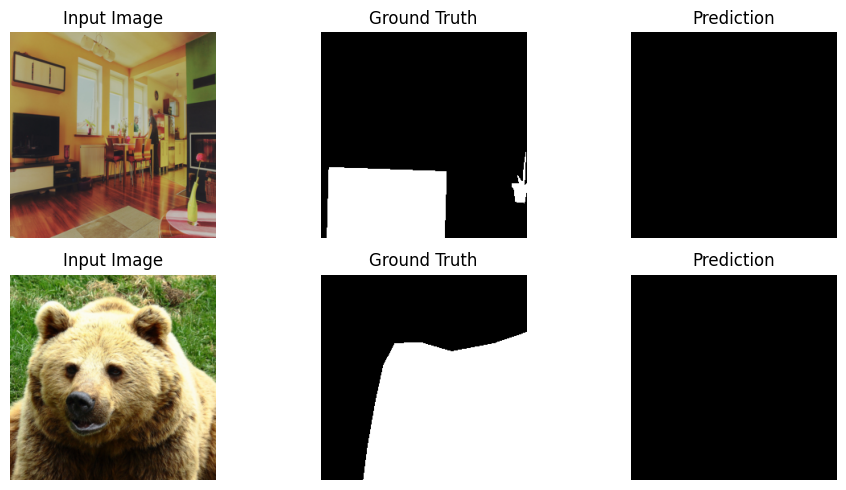

In [ ]:
test(vanilla_unet, val_loader)

tensor(0)
tensor(0)


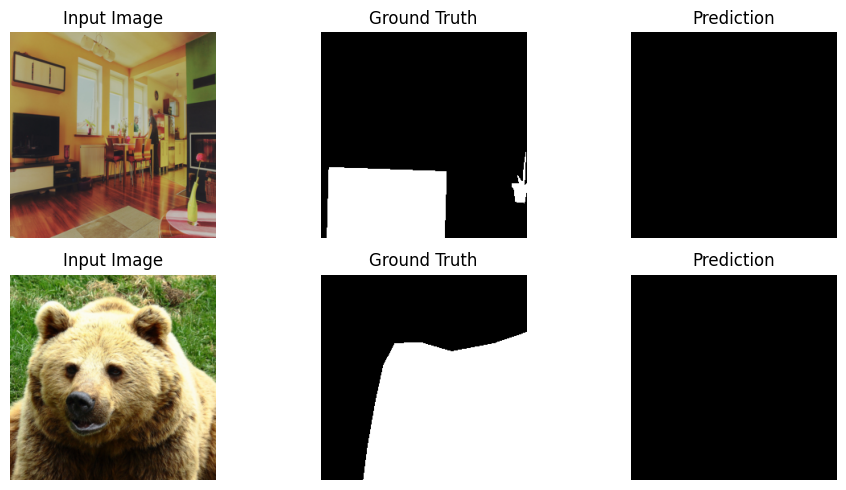

In [ ]:
test(resnet_unet, val_loader)

In [ ]:
# test(swin_unet, val_loader)

### Saving and Loading

In [ ]:
# torch.save(the_model.state_dict(), "./models/my_model.pt")
# the_model = TheModelClass(*args, **kwargs)
# the_model.load_state_dict(torch.load("./models/my_model.pt"))

In [ ]:
# torch.save(the_model, "./models/my_model.pt")
# the_model = torch.load("./models/my_model.pt")